## PART 1 - Popularity Prediction

<font size=4> **Question 1**: Report the following statistics for each hashtag, i.e. each file:
  - Average number of tweets per hour;
  - Average number of followers of users posting the tweets per tweet (to make it simple, we average over the number of tweets; if a user posted twice, we count the user and the user’s followers twice as well);
  - Average number of retweets per tweet.
</font>

In [1]:
import json
import numpy as np

def report_statistics(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        max_time = 0
        min_time = np.inf
        total_followers = 0
        total_retweets = 0
        total_tweets = len(lines)
        for line in lines:
            json_obj = json.loads(line)
            if json_obj['citation_date'] > max_time:
                max_time = json_obj['citation_date']
            if json_obj['citation_date'] < min_time:
                min_time = json_obj['citation_date']
            total_followers += json_obj['author']['followers']
            total_retweets += json_obj['metrics']['citations']['total']
        avg_tweets_per_h = total_tweets * 3600 / (max_time - min_time)
        avg_followers_per_tweet = total_followers / total_tweets
        avg_retweets_per_tweet = total_retweets / total_tweets
        print(filename)
        print('Average number of tweets per hour: ', avg_tweets_per_h)
        print('Average number of followers of users posting the tweets per tweet: ', avg_followers_per_tweet)
        print('Average number of retweets per tweet: ', avg_retweets_per_tweet)
        print('-' * 50)

In [2]:
files = ['ECE219_tweet_data/tweets_#gohawks.txt', 'ECE219_tweet_data/tweets_#gopatriots.txt', 
         'ECE219_tweet_data/tweets_#nfl.txt', 'ECE219_tweet_data/tweets_#patriots.txt', 
         'ECE219_tweet_data/tweets_#sb49.txt', 'ECE219_tweet_data/tweets_#superbowl.txt']

for file in files:
    report_statistics(file)

ECE219_tweet_data/tweets_#gohawks.txt
Average number of tweets per hour:  292.48785062173687
Average number of followers of users posting the tweets per tweet:  2217.9237355281984
Average number of retweets per tweet:  2.0132093991319877
--------------------------------------------------
ECE219_tweet_data/tweets_#gopatriots.txt
Average number of tweets per hour:  40.954698006061946
Average number of followers of users posting the tweets per tweet:  1427.2526051635405
Average number of retweets per tweet:  1.4081919101697078
--------------------------------------------------
ECE219_tweet_data/tweets_#nfl.txt
Average number of tweets per hour:  397.0213901819841
Average number of followers of users posting the tweets per tweet:  4662.37544523693
Average number of retweets per tweet:  1.5344602655543254
--------------------------------------------------
ECE219_tweet_data/tweets_#patriots.txt
Average number of tweets per hour:  750.8942646068899
Average number of followers of users posting

<font size=4> **Question 2:** Plot “number of tweets in hour” over time for #SuperBowl and #NFL (a bar plot with 1-hour bins). The tweets are stored in separate files for different hashtags and files are named as tweet_[#hashtag].txt. </font>

In [3]:
import math 
import matplotlib.pyplot as plt
import datetime
import pytz

pst_tz = pytz.timezone('America/Los_Angeles')

def report_tweets(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        max_time = 0
        min_time = np.inf
        total_tweets = len(lines)
        for line in lines:
            json_obj = json.loads(line)
            if json_obj['citation_date'] > max_time:
                max_time = json_obj['citation_date']
            if json_obj['citation_date'] < min_time:
                min_time = json_obj['citation_date']
        
        total_hours = math.ceil((max_time - min_time) / 3600)
        n_tweets = [0] * total_hours
        for line in lines:
            json_obj = json.loads(line)
            index = math.floor((json_obj['citation_date'] - min_time) / 3600)
            n_tweets[index] += 1
        return n_tweets

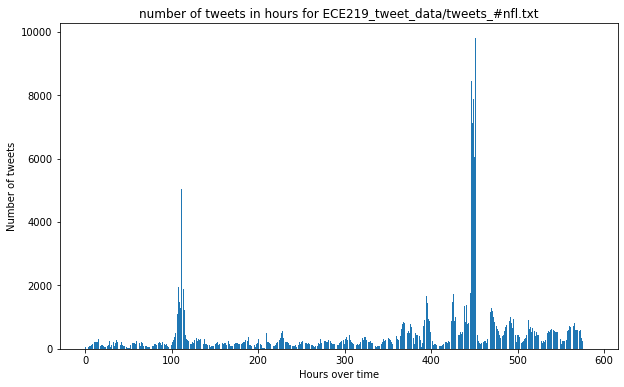

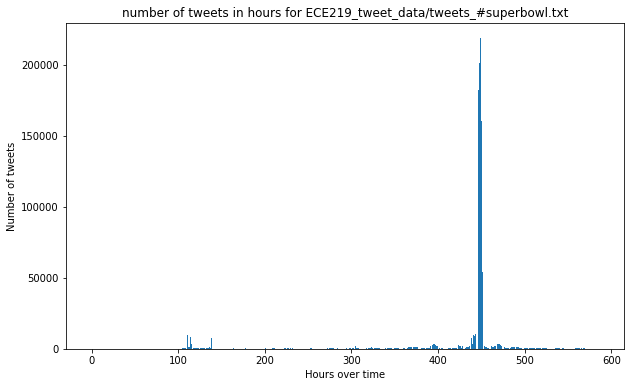

In [4]:
q2_files = ['ECE219_tweet_data/tweets_#nfl.txt','ECE219_tweet_data/tweets_#superbowl.txt']

for file in q2_files:
    n_tweets = report_tweets(file)
    plt.figure(figsize=(10,6))
    plt.bar(range(len(n_tweets)),n_tweets)
    plt.xlabel('Hours over time')
    plt.ylabel('Number of tweets')
    plt.title('number of tweets in hours for '+file)

<font size=4> **Question 3:** For each of your models, report your model's Mean Squared Error (MSE) and R-squared measure. Also, analyse the significance of each feature using the t-test and p-value. You may use the OLS in the library statsmodels in Python. </font>

In [5]:
def report_features(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        max_time = 0
        min_time = np.inf
        total_tweets = len(lines)
        total_followers = 0
        total_retweets = 0
        for line in lines:
            json_obj = json.loads(line)
            if json_obj['citation_date'] > max_time:
                max_time = json_obj['citation_date']
            if json_obj['citation_date'] < min_time:
                min_time = json_obj['citation_date']
            total_followers += json_obj['author']['followers']
            total_retweets += json_obj['metrics']['citations']['total']
        
        total_hours = math.ceil((max_time - min_time) / 3600)
        #initialize features
        features = np.zeros((total_hours,5))
        for hour in range(total_hours):
            features[hour][4] = datetime.datetime.fromtimestamp((min_time + hour * 3600), pst_tz).hour #time of the day
        for line in lines:
            json_obj = json.loads(line)
            index = math.floor((json_obj['citation_date'] - min_time) / 3600)
            features[index][0] += 1 #number of tweets
            features[index][1] += json_obj['metrics']['citations']['total'] #number of retweets
            features[index][2] += json_obj['author']['followers'] #number of followers
            features[index][3] = max(features[index][3], json_obj['author']['followers']) #max number of followers
            
        return features

In [6]:
import statsmodels.api as sm
from sklearn import metrics

for file in files:
    features = report_features(file)
    x = features[:-1,:]
    y_true = features[1:,0]

    lr_fit = sm.OLS(y_true,x).fit()
    y_pred = lr_fit.predict()
    print('Hashtag: ' + file)
    print('MSE: ', metrics.mean_squared_error(y_true, y_pred))
    print(lr_fit.summary())
    print('\n')

Hashtag: ECE219_tweet_data/tweets_#gohawks.txt
MSE:  717636.4421300611
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.528
Model:                            OLS   Adj. R-squared (uncentered):              0.524
Method:                 Least Squares   F-statistic:                              128.2
Date:                Sun, 22 Mar 2020   Prob (F-statistic):                    5.72e-91
Time:                        19:08:45   Log-Likelihood:                         -4716.9
No. Observations:                 578   AIC:                                      9444.
Df Residuals:                     573   BIC:                                      9466.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      

Hashtag: ECE219_tweet_data/tweets_#sb49.txt
MSE:  13170997.953818945
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.842
Model:                            OLS   Adj. R-squared (uncentered):              0.840
Method:                 Least Squares   F-statistic:                              613.3
Date:                Sun, 22 Mar 2020   Prob (F-statistic):                   3.58e-228
Time:                        19:11:15   Log-Likelihood:                         -5596.3
No. Observations:                 582   AIC:                                  1.120e+04
Df Residuals:                     577   BIC:                                  1.122e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>

<font size=4> **Question 4:** Design a regression model using any features from the papers you find or other new features you may find useful for this problem. Fit your model on the data of each hashtag and report fitting MSE and significance of features.

<font size=4> **Question 5:** For each of the top 3 features (i.e. with the smallest p-values) in your measurements, draw a scatter plot of predictant (number of tweets for next hour) versus value of that feature, using all the samples you have extracted, and analyze it.

In [7]:
# find the intersected time intervals for all twitter data
def get_time_interval(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        max_time = 0
        min_time = np.inf
        for line in lines:
            json_obj = json.loads(line)
            if json_obj['citation_date'] > max_time:
                max_time = json_obj['citation_date']
            if json_obj['citation_date'] < min_time:
                min_time = json_obj['citation_date']
        return max_time, min_time
    
max_t = []
min_t = []
for file in files:
    max_time, min_time = get_time_interval(file)
    max_t.append(max_time)
    min_t.append(min_time)

max_time_agg = min(max_t)
min_time_agg = max(min_t)

In [8]:
feature_names = ['Number of tweets', 'Total number of retweets', 'Sum of the number of followers', 
                'Maximum number of followers', 'Time of the day', 'Sum of ranking score',
                'Sum of passivity', 'Total number of unique users','Total number of unique authors', 
                'Total number of user mentions']

mnth_to_int = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
              'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

def get_days(user_create_time, tweet_create_time):
    user_create_date = user_create_time.split(' ')
    tweet_create_date = tweet_create_time.split(' ')
    user_create_date = datetime.datetime(int(user_create_date[-1]), mnth_to_int[user_create_date[1]], int(user_create_date[2]))
    tweet_create_date = datetime.datetime(int(tweet_create_date[-1]), mnth_to_int[tweet_create_date[1]], int(tweet_create_date[2]))
    created_days = tweet_create_date - user_create_date
    created_days = created_days.days
    return created_days
    

def report_features2(filename, min_time, max_time):
    with open(filename, 'r') as file:
        lines = file.readlines()
        
        total_hours = math.ceil((max_time - min_time) / 3600)
        user_ids = {hour:set() for hour in range(total_hours)}
        author_nicks = {hour:set() for hour in range(total_hours)}
        
        #initialize features
        features = np.zeros((total_hours,len(feature_names)))
        
        for hour in range(total_hours):
            features[hour][4] = datetime.datetime.fromtimestamp((min_time + hour * 3600), pst_tz).hour
            
        for line in lines:
            json_obj = json.loads(line)
            
            if json_obj['citation_date'] >= min_time and json_obj['citation_date'] <= max_time:
                index = math.floor((json_obj['citation_date'] - min_time) / 3600)
                features[index][0] += 1 #number of tweets
                features[index][1] += json_obj['metrics']['citations']['total'] #number of retweets
                features[index][2] += json_obj['author']['followers'] #number of followers
                features[index][3] = max(features[index][3], json_obj['author']['followers']) #max number of followers

                features[index][5] += json_obj['metrics']['ranking_score'] #sum of ranking score
                n_days = get_days(json_obj['tweet']['user']['created_at'], json_obj['tweet']['created_at']) #get the number of days since the user account was created
                features[index][6] += n_days/(1.0 + json_obj['tweet']['user']['statuses_count']) #sum of passivity
                if json_obj['tweet']['user']['id'] not in user_ids[index]:
                    user_ids[index].add(json_obj['tweet']['user']['id'])               
                features[index][7] = len(user_ids[index]) #number of unique users
                if json_obj['author']['nick'] not in author_nicks[index]:
                    author_nicks[index].add(json_obj['author']['nick'])
                features[index][8] = len(author_nicks[index]) #number of unique authors
                features[index][9] += len(json_obj['tweet']['entities']['user_mentions']) #number of user mentions
        
        return features

def scatter_plot(features, hashtag, y_pred, pvalues, feature_names):
    ranked_index = np.argsort(pvalues)
    print('Hashtag: ' + hashtag)
    for i in range(3):
        plt.figure(figsize = (8,5))
        plt.scatter(features[:,ranked_index[i]], y_pred, alpha=0.5)
        plt.xlabel(feature_names[ranked_index[i]])
        plt.ylabel("Number of tweets next hour")
        plt.grid(True)
        plt.show()
    print('-' * 80)

Hashtag: ECE219_tweet_data/tweets_#gohawks.txt
MSE:  296042.31731156056
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.783
Model:                            OLS   Adj. R-squared (uncentered):              0.779
Method:                 Least Squares   F-statistic:                              201.8
Date:                Sun, 22 Mar 2020   Prob (F-statistic):                   1.43e-178
Time:                        19:15:54   Log-Likelihood:                         -4407.0
No. Observations:                 571   AIC:                                      8834.
Df Residuals:                     561   BIC:                                      8878.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t     

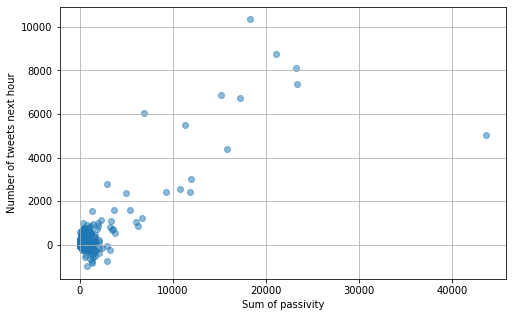

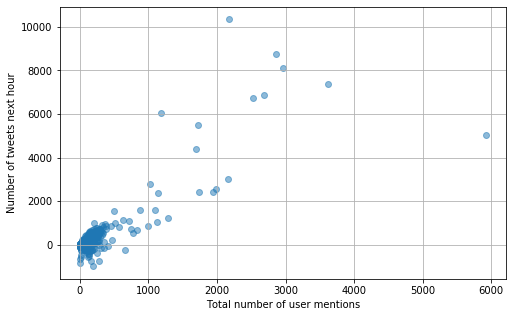

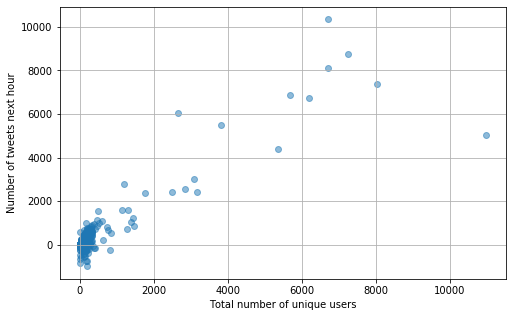

--------------------------------------------------------------------------------


Hashtag: ECE219_tweet_data/tweets_#gopatriots.txt
MSE:  21727.945699825486
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.742
Model:                            OLS   Adj. R-squared (uncentered):              0.738
Method:                 Least Squares   F-statistic:                              161.6
Date:                Sun, 22 Mar 2020   Prob (F-statistic):                   5.56e-158
Time:                        19:15:56   Log-Likelihood:                         -3661.3
No. Observations:                 571   AIC:                                      7343.
Df Residuals:                     561   BIC:                                      7386.
Df Model:                          10                                                  
Covariance Type:            nonrobust             

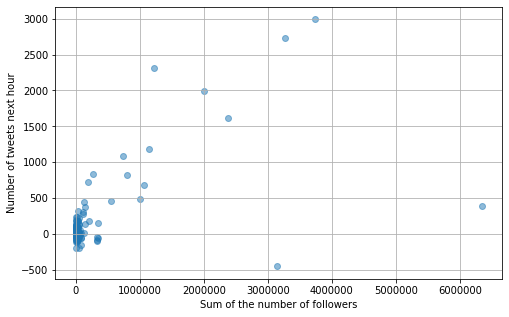

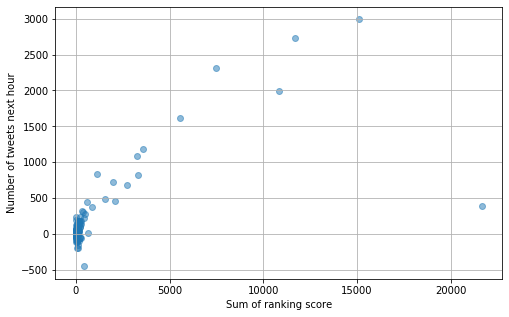

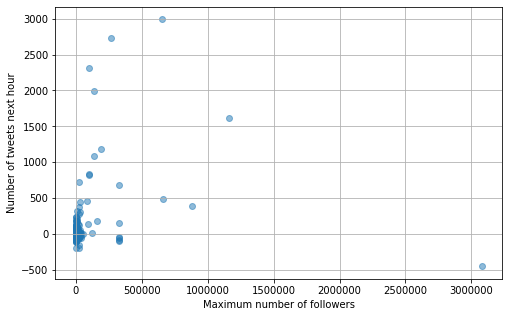

--------------------------------------------------------------------------------


Hashtag: ECE219_tweet_data/tweets_#nfl.txt
MSE:  184288.3990593156
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.768
Model:                            OLS   Adj. R-squared (uncentered):              0.764
Method:                 Least Squares   F-statistic:                              186.0
Date:                Sun, 22 Mar 2020   Prob (F-statistic):                   7.02e-171
Time:                        19:16:13   Log-Likelihood:                         -4271.7
No. Observations:                 571   AIC:                                      8563.
Df Residuals:                     561   BIC:                                      8607.
Df Model:                          10                                                  
Covariance Type:            nonrobust                     

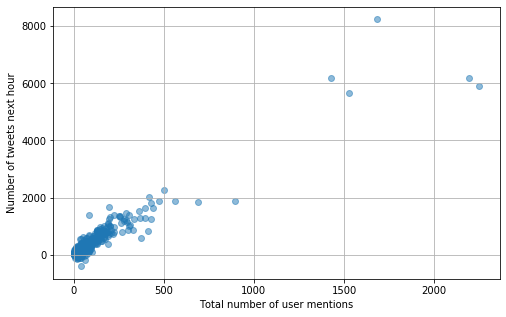

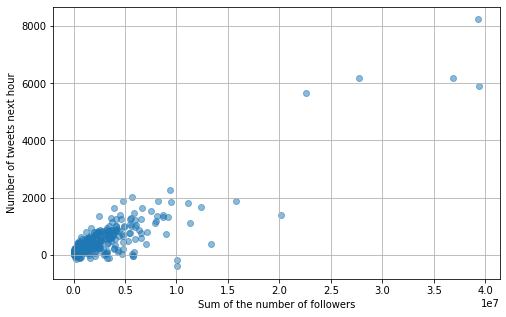

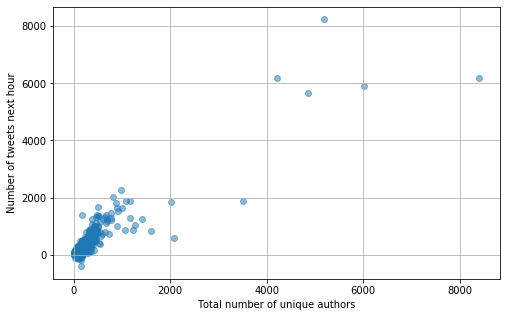

--------------------------------------------------------------------------------


Hashtag: ECE219_tweet_data/tweets_#patriots.txt
MSE:  3619767.990944816
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.783
Model:                            OLS   Adj. R-squared (uncentered):              0.779
Method:                 Least Squares   F-statistic:                              202.0
Date:                Sun, 22 Mar 2020   Prob (F-statistic):                   1.18e-178
Time:                        19:16:44   Log-Likelihood:                         -5121.8
No. Observations:                 571   AIC:                                  1.026e+04
Df Residuals:                     561   BIC:                                  1.031e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                

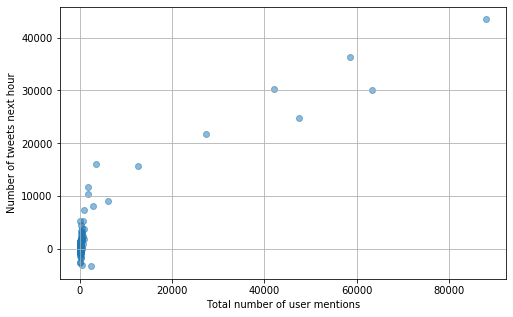

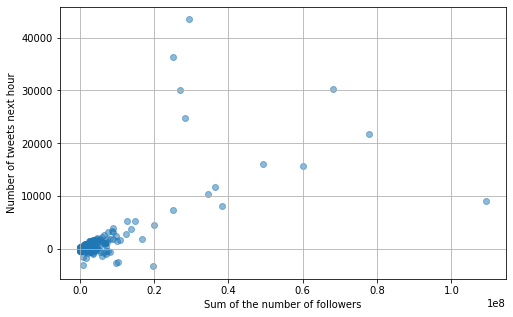

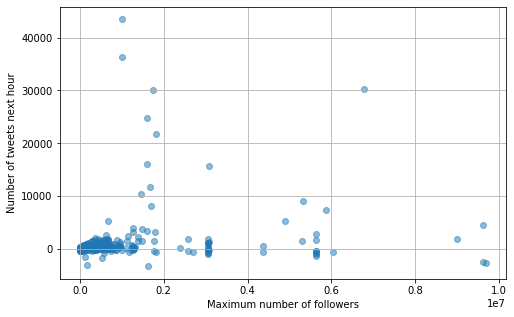

--------------------------------------------------------------------------------


Hashtag: ECE219_tweet_data/tweets_#sb49.txt
MSE:  8860126.964503337
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.895
Model:                            OLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                              480.7
Date:                Sun, 22 Mar 2020   Prob (F-statistic):                   1.30e-267
Time:                        19:17:34   Log-Likelihood:                         -5377.4
No. Observations:                 571   AIC:                                  1.077e+04
Df Residuals:                     561   BIC:                                  1.082e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                    

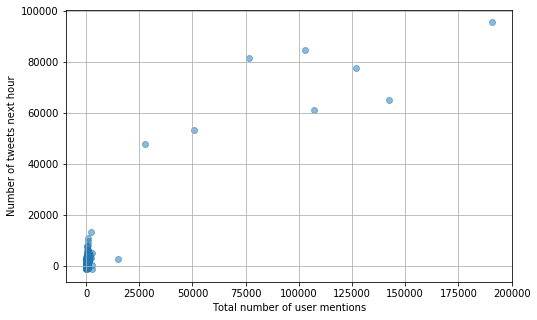

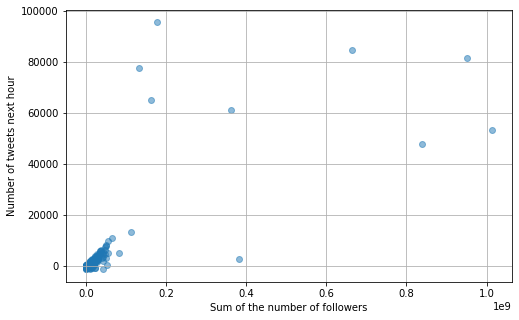

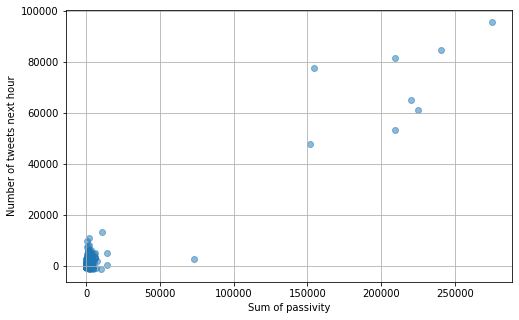

--------------------------------------------------------------------------------


Hashtag: ECE219_tweet_data/tweets_#superbowl.txt
MSE:  15458967.544835113
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                              932.3
Date:                Sun, 22 Mar 2020   Prob (F-statistic):                        0.00
Time:                        19:18:55   Log-Likelihood:                         -5536.3
No. Observations:                 571   AIC:                                  1.109e+04
Df Residuals:                     561   BIC:                                  1.114e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust              

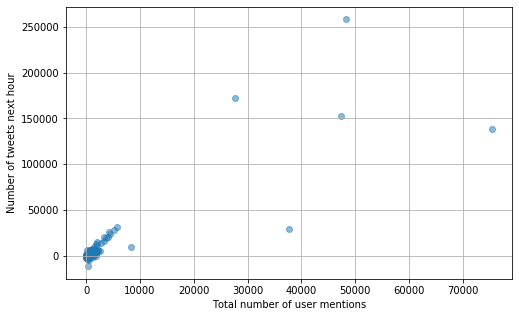

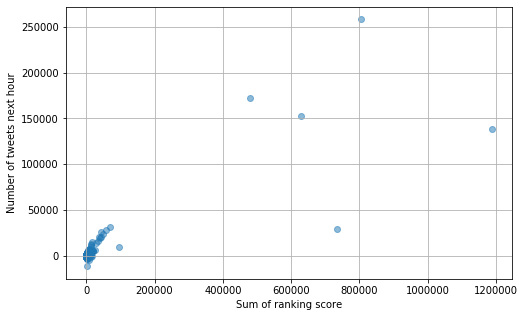

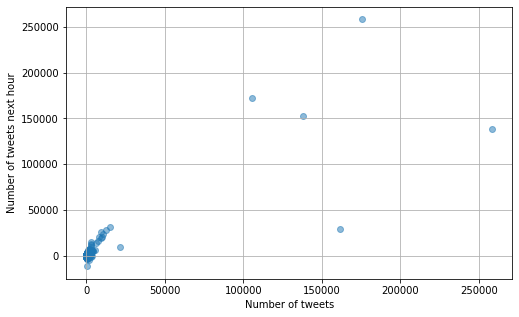

--------------------------------------------------------------------------------




In [9]:
import statsmodels.api as sm
from sklearn import metrics


for file in files:
    features = report_features2(file, min_time_agg, max_time_agg)
    x = features[:-1,:] #training features
    y_true = features[1:,0] #true labels

    lr_fit = sm.OLS(y_true,x).fit()
    y_pred = lr_fit.predict()
    pvalues = lr_fit.pvalues
    print('Hashtag: ' + file)
    print('MSE: ', metrics.mean_squared_error(y_true, y_pred))
    print(lr_fit.summary())
    scatter_plot(x, file, y_pred, pvalues, feature_names)
    print('\n')

<font size=4> **Question 6:** We define three time periods and their corresponding window length as follows:
    1. Before Feb. 1, 8:00 a.m.: 1-hour window
    2. Between Feb. 1, 8:00 a.m. and 8:00 p.m.: 5-minute window
    3. After Feb. 1, 8:00 p.m.: 1-hour window
    
For each hashtag, train 3 regression models, one for each of these time periods (the times are all in PST). Report the MSE and R-squared score for each case.

In [10]:
# find the intersected time intervals for all twitter data
def get_time_interval(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        max_time = 0
        min_time = np.inf
        for line in lines:
            json_obj = json.loads(line)
            if json_obj['citation_date'] > max_time:
                max_time = json_obj['citation_date']
            if json_obj['citation_date'] < min_time:
                min_time = json_obj['citation_date']
        return max_time, min_time
    
max_t = []
min_t = []
for file in files:
    max_time, min_time = get_time_interval(file)
    max_t.append(max_time)
    min_t.append(min_time)

max_time_agg = min(max_t)
min_time_agg = max(min_t)

In [11]:
import datetime
import time
import pytz

pst_tz = pytz.timezone('America/Los_Angeles')

pre_active_time = datetime.datetime(2015, 2, 1, 8, 0, 0, 0, pst_tz)
post_active_time = datetime.datetime(2015, 2, 1, 20, 0, 0, 0, pst_tz)
pre_active_timestamp = time.mktime(pre_active_time.timetuple())
post_active_timestamp = time.mktime(post_active_time.timetuple())

In [12]:
def report_features3(filename, min_time, max_time):
    with open(filename, 'r') as file:
        lines = file.readlines()
        total_tweets = len(lines)
        total_followers = 0
        total_retweets = 0
    
        min_time = time.mktime(datetime.datetime.fromtimestamp(min_time).replace(minute=0, second=0, microsecond=0).timetuple())
        #max_time = time.mktime(datetime.datetime.fromtimestamp(max_time).replace(minute=0, second=0, microsecond=0).timetuple())
        
        time_window_len1 = math.ceil((pre_active_timestamp - min_time) / (60*60)) #Before Feb. 1, 8:00 a.m.: 1-hour window
        time_window_len2 = math.ceil((post_active_timestamp - pre_active_timestamp) / (60*5)) #Between Feb. 1, 8:00 a.m. and 8:00 p.m.: 5-minute window
        time_window_len3 = math.ceil((max_time - post_active_timestamp) / (60*60)) #After Feb. 1, 8:00 p.m.: 1-hour window
        
        total_window_len = time_window_len1 + time_window_len2 + time_window_len3
        user_ids = {time:set() for time in range(total_window_len)}
        author_nicks = {time:set() for time in range(total_window_len)}
        
        #initialize features
        features = np.zeros((total_window_len,len(feature_names)))
        
        #assign features
        for hour1 in range(time_window_len1):
            features[hour1][4] = datetime.datetime.fromtimestamp((min_time + hour1*60*60), pst_tz).hour
            
        for five_minutes in range(time_window_len2):
            features[time_window_len1+five_minutes][4] = datetime.datetime.fromtimestamp((pre_active_timestamp + five_minutes*60*5), pst_tz).hour

        for hour2 in range(time_window_len3):
            features[time_window_len1+time_window_len2+hour2][4] = datetime.datetime.fromtimestamp((post_active_timestamp + hour2*60*60), pst_tz).hour
            
        for line in lines:
            json_obj = json.loads(line)
            if json_obj['citation_date'] >= min_time and json_obj['citation_date'] <= max_time:
                if json_obj['citation_date'] < pre_active_timestamp:
                    index = math.floor((json_obj['citation_date'] - min_time) / 3600)
                    features[index][0] += 1 #number of tweets
                    features[index][1] += json_obj['metrics']['citations']['total'] #number of retweets
                    features[index][2] += json_obj['author']['followers'] #number of followers
                    features[index][3] = max(features[index][3], json_obj['author']['followers']) #max number of followers

                    features[index][5] += json_obj['metrics']['ranking_score'] #sum of ranking score
                    n_days = get_days(json_obj['tweet']['user']['created_at'], json_obj['tweet']['created_at']) #get the number of days since the user account was created
                    features[index][6] += n_days/(1.0 + json_obj['tweet']['user']['statuses_count']) #sum of passivity
                    if json_obj['tweet']['user']['id'] not in user_ids[index]:
                        user_ids[index].add(json_obj['tweet']['user']['id'])               
                    features[index][7] = len(user_ids[index]) #number of unique users
                    if json_obj['author']['nick'] not in author_nicks[index]:
                        author_nicks[index].add(json_obj['author']['nick'])
                    features[index][8] = len(author_nicks[index]) #number of unique authors
                    features[index][9] += len(json_obj['tweet']['entities']['user_mentions']) #number of user mentions

                elif json_obj['citation_date'] < post_active_timestamp:
                    index = math.floor((json_obj['citation_date'] - pre_active_timestamp) / 300) + time_window_len1
                    features[index][0] += 1 #number of tweets
                    features[index][1] += json_obj['metrics']['citations']['total'] #number of retweets
                    features[index][2] += json_obj['author']['followers'] #number of followers
                    features[index][3] = max(features[index][3], json_obj['author']['followers']) #max number of followers

                    features[index][5] += json_obj['metrics']['ranking_score'] #sum of ranking score
                    n_days = get_days(json_obj['tweet']['user']['created_at'], json_obj['tweet']['created_at']) #get the number of days since the user account was created
                    features[index][6] += n_days/(1.0 + json_obj['tweet']['user']['statuses_count']) #sum of passivity
                    if json_obj['tweet']['user']['id'] not in user_ids[index]:
                        user_ids[index].add(json_obj['tweet']['user']['id'])               
                    features[index][7] = len(user_ids[index]) #number of unique users
                    if json_obj['author']['nick'] not in author_nicks[index]:
                        author_nicks[index].add(json_obj['author']['nick'])
                    features[index][8] = len(author_nicks[index]) #number of unique authors
                    features[index][9] += len(json_obj['tweet']['entities']['user_mentions']) #number of user mentions

                else:
                    index = math.floor((json_obj['citation_date'] - post_active_timestamp) / 3600) + time_window_len1 + time_window_len2
                    features[index][0] += 1 #number of tweets
                    features[index][1] += json_obj['metrics']['citations']['total'] #number of retweets
                    features[index][2] += json_obj['author']['followers'] #number of followers
                    features[index][3] = max(features[index][3], json_obj['author']['followers']) #max number of followers

                    features[index][5] += json_obj['metrics']['ranking_score'] #sum of ranking score
                    n_days = get_days(json_obj['tweet']['user']['created_at'], json_obj['tweet']['created_at']) #get the number of days since the user account was created
                    features[index][6] += n_days/(1.0 + json_obj['tweet']['user']['statuses_count']) #sum of passivity
                    if json_obj['tweet']['user']['id'] not in user_ids[index]:
                        user_ids[index].add(json_obj['tweet']['user']['id'])               
                    features[index][7] = len(user_ids[index]) #number of unique users
                    if json_obj['author']['nick'] not in author_nicks[index]:
                        author_nicks[index].add(json_obj['author']['nick'])
                    features[index][8] = len(author_nicks[index]) #number of unique authors
                    features[index][9] += len(json_obj['tweet']['entities']['user_mentions']) #number of user mentions
        
        return features[:time_window_len1], features[time_window_len1:time_window_len1 + time_window_len2], features[time_window_len1 + time_window_len2:]

In [13]:
for file in files:
    print('Hashtag: ' + file)
    features_before, features_between, features_after = report_features3(file, min_time_agg, max_time_agg)

    x_before = features_before[:-1,:] #training features
    y_true_before = features_before[1:,0] #true labels
    lr_before_fit = sm.OLS(y_true_before,x_before).fit()
    y_pred_before = lr_before_fit.predict()
    print('Before Feb. 1, 8:00 a.m.:')
    print('MSE: ', metrics.mean_squared_error(y_true_before, y_pred_before))
    print(lr_before_fit.summary())
    print('-' * 80)

    x_between = features_between[:-1,:] #training features
    y_true_between = features_between[1:,0] #true labels
    lr_between_fit = sm.OLS(y_true_between,x_between).fit()
    y_pred_between = lr_between_fit.predict()
    print('Between Feb. 1, 8:00 a.m. and 8:00 p.m.:')
    print('MSE: ', metrics.mean_squared_error(y_true_between, y_pred_between))
    print(lr_between_fit.summary())
    print('-' * 80)

    x_after = features_after[:-1,:] #training features
    y_true_after = features_after[1:,0] #true labels
    lr_after_fit = sm.OLS(y_true_after,x_after).fit()
    y_pred_after = lr_after_fit.predict()
    print('After Feb. 1, 8:00 p.m.:')
    print('MSE: ', metrics.mean_squared_error(y_true_after, y_pred_after))
    print(lr_after_fit.summary())

    print('=' * 80)
    print('\n')

Hashtag: ECE219_tweet_data/tweets_#gohawks.txt
Before Feb. 1, 8:00 a.m.:
MSE:  355434.3190027426
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.677
Model:                            OLS   Adj. R-squared (uncentered):              0.669
Method:                 Least Squares   F-statistic:                              89.00
Date:                Sun, 22 Mar 2020   Prob (F-statistic):                    1.08e-97
Time:                        19:21:28   Log-Likelihood:                         -3397.1
No. Observations:                 435   AIC:                                      6814.
Df Residuals:                     425   BIC:                                      6855.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef  

Before Feb. 1, 8:00 a.m.:
MSE:  1165.625384712215
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.730
Model:                            OLS   Adj. R-squared (uncentered):              0.724
Method:                 Least Squares   F-statistic:                              114.8
Date:                Sun, 22 Mar 2020   Prob (F-statistic):                   4.08e-114
Time:                        19:21:30   Log-Likelihood:                         -2153.0
No. Observations:                 435   AIC:                                      4326.
Df Residuals:                     425   BIC:                                      4367.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025    

Before Feb. 1, 8:00 a.m.:
MSE:  64275.65269227107
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.698
Model:                            OLS   Adj. R-squared (uncentered):              0.691
Method:                 Least Squares   F-statistic:                              98.18
Date:                Sun, 22 Mar 2020   Prob (F-statistic):                   7.31e-104
Time:                        19:21:46   Log-Likelihood:                         -3025.2
No. Observations:                 435   AIC:                                      6070.
Df Residuals:                     425   BIC:                                      6111.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025    

Before Feb. 1, 8:00 a.m.:
MSE:  319266.5192922877
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.639
Model:                            OLS   Adj. R-squared (uncentered):              0.631
Method:                 Least Squares   F-statistic:                              75.26
Date:                Sun, 22 Mar 2020   Prob (F-statistic):                    1.33e-87
Time:                        19:22:14   Log-Likelihood:                         -3373.8
No. Observations:                 435   AIC:                                      6768.
Df Residuals:                     425   BIC:                                      6808.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025    

Before Feb. 1, 8:00 a.m.:
MSE:  5553.790658100765
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.907
Method:                 Least Squares   F-statistic:                              426.7
Date:                Sun, 22 Mar 2020   Prob (F-statistic):                   1.40e-214
Time:                        19:23:04   Log-Likelihood:                         -2492.6
No. Observations:                 435   AIC:                                      5005.
Df Residuals:                     425   BIC:                                      5046.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025    

Before Feb. 1, 8:00 a.m.:
MSE:  483069.30103902105
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.547
Model:                            OLS   Adj. R-squared (uncentered):              0.536
Method:                 Least Squares   F-statistic:                              51.30
Date:                Sun, 22 Mar 2020   Prob (F-statistic):                    7.07e-67
Time:                        19:24:25   Log-Likelihood:                         -3463.9
No. Observations:                 435   AIC:                                      6948.
Df Residuals:                     425   BIC:                                      6988.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025   

<font size=4> **Question 7:** Also, aggregate the data of all hashtags, and train 3 models (for the intervals mentioned above) to predict the number of tweets in the next time window on the aggregated data. Perform the same evaluations on your combined model and compare with models you trained for individual hashtags.

In [14]:
# aggregrate features
features_before, features_between, features_after = report_features3(files[0], min_time_agg, max_time_agg)

for file in files[1:]:
    f_before, f_between, f_after = report_features3(file, min_time_agg, max_time_agg)
    features_before[:,:3] += f_before[:,:3]
    features_before[:,3] = np.maximum(f_before[:,3], features_before[:,3])
    features_before[:,5:] += f_before[:,5:]
    
    features_between[:,:3] += f_between[:,:3]
    features_between[:,3] = np.maximum(f_between[:,3], features_between[:,3])
    features_between[:,5:] += f_between[:,5:]
    
    features_after[:,:3] += f_after[:,:3]
    features_after[:,3] = np.maximum(f_after[:,3], features_after[:,3])
    features_after[:,5:] += f_after[:,5:]

In [15]:
import statsmodels.api as sm
from sklearn import metrics

print('Aggregate data')
x_before = features_before[:-1,:] #training features
y_true_before = features_before[1:,0] #true labels
lr_before_fit = sm.OLS(y_true_before,x_before).fit()
y_pred_before = lr_before_fit.predict()
print('Before Feb. 1, 8:00 a.m.:')
print('MSE: ', metrics.mean_squared_error(y_true_before, y_pred_before))
print(lr_before_fit.summary())
print('-' * 100)
print('\n')

x_between = features_between[:-1,:] #training features
y_true_between = features_between[1:,0] #true labels
lr_between_fit = sm.OLS(y_true_between,x_between).fit()
y_pred_between = lr_between_fit.predict()
print('Between Feb. 1, 8:00 a.m. and 8:00 p.m.:')
print('MSE: ', metrics.mean_squared_error(y_true_between, y_pred_between))
print(lr_between_fit.summary())
print('-' * 100)
print('\n')

x_after = features_after[:-1,:] #training features
y_true_after = features_after[1:,0] #true labels
lr_after_fit = sm.OLS(y_true_after,x_after).fit()
y_pred_after = lr_after_fit.predict()
print('After Feb. 1, 8:00 p.m.:')
print('MSE: ', metrics.mean_squared_error(y_true_after, y_pred_after))
print(lr_after_fit.summary())

Aggregate data
Before Feb. 1, 8:00 a.m.:
MSE:  4186900.7222847324
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.558
Model:                            OLS   Adj. R-squared (uncentered):              0.548
Method:                 Least Squares   F-statistic:                              53.68
Date:                Sun, 22 Mar 2020   Prob (F-statistic):                    3.70e-69
Time:                        19:27:32   Log-Likelihood:                         -3933.6
No. Observations:                 435   AIC:                                      7887.
Df Residuals:                     425   BIC:                                      7928.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|

<font size=4> **Question 8:** Use grid search to find the best parameter set for RandomForestRegressor and GradientBoostingRegressor respectively. Use the following param grid
    
    {
    'max_depth': [10, 30, 50, 70, 100, 200, None], 
    'max_features': ['auto', 'sqrt'], 
    'min_samples_leaf': [1, 2,3, 4], 
    'min_samples_split': [2, 5, 10], 
    'n_estimators': [200, 400, 600, 800, 1000,
                    1200, 1400, 1600, 1800, 2000]
    }
Set cv = KFold(5, shuffle=True), scoring=’neg_mean_squared_error’ for the grid search.

In [16]:
# aggregrate entire dataset
data_agg = report_features2(files[0], min_time_agg, max_time_agg)

for file in files[1:]:
    data = report_features2(file, min_time_agg, max_time_agg)
    data_agg[:,:3] += data[:,:3]
    data_agg[:,3] = np.maximum(data[:,3], data_agg[:,3])
    data_agg[:,5:] += data[:,5:]
    
x_agg = data_agg[:-1,:]
y_agg = data_agg[1:,0]

In [17]:
# RandomForest GridSearch
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


pipe_rf = Pipeline([
    ('standardize', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42))
])

param_grid = {
    'model__max_depth': [10, 30, 50, 70, 100, 200, None],
    'model__max_features': ['auto', 'sqrt'],
    'model__min_samples_leaf': [1, 2, 3, 4],
    'model__min_samples_split': [2, 5, 10],
    'model__n_estimators': [200, 400, 600, 800, 1000,
                           1200, 1400, 1600, 1800, 2000]
}

grid_rf = GridSearchCV(pipe_rf, param_grid=param_grid, cv=KFold(5, shuffle=True, random_state=42), n_jobs=-1, verbose=1,
                       scoring='neg_mean_squared_error').fit(x_agg, y_agg)
result_rf = pd.DataFrame(grid_rf.cv_results_)[['mean_test_score', 'param_model__max_depth', 'param_model__max_features',
                                             'param_model__min_samples_leaf', 'param_model__min_samples_split',
                                             'param_model__n_estimators']]
result_rf = result_rf.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
result_rf.head()

Fitting 5 folds for each of 1680 candidates, totalling 8400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1752 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 2402 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 4952 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 6002 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 7152 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 8400 out of 8400 | elapsed: 18.0min finished


,mean_test_score,param_model__max_depth,param_model__max_features,param_model__min_samples_leaf,param_model__min_samples_split,param_model__n_estimators
0,-2.295841e+08,50,sqrt,3,5,400
1,-2.295841e+08,200,sqrt,3,5,400
2,-2.295841e+08,50,sqrt,3,2,400
3,-2.295841e+08,70,sqrt,3,2,400
4,-2.295841e+08,None,sqrt,3,2,400


In [18]:
# GradientBoosting GridSearch
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor


pipe_gb = Pipeline([
    ('standardize', StandardScaler()),
    ('model', GradientBoostingRegressor(random_state=42))
])

param_grid = {
    'model__max_depth': [10, 30, 50, 70, 100, 200, None],
    'model__max_features': ['auto', 'sqrt'],
    'model__min_samples_leaf': [1, 2, 3, 4],
    'model__min_samples_split': [2, 5, 10],
    'model__n_estimators': [200, 400, 600, 800, 1000,
                           1200, 1400, 1600, 1800, 2000]
}


grid_gb = GridSearchCV(pipe_gb, param_grid=param_grid, cv=KFold(5, shuffle=True, random_state=42), n_jobs=-1, verbose=1,
                       scoring='neg_mean_squared_error').fit(x_agg, y_agg)
result_gb = pd.DataFrame(grid_gb.cv_results_)[['mean_test_score', 'param_model__max_depth', 'param_model__max_features',
                                             'param_model__min_samples_leaf', 'param_model__min_samples_split',
                                             'param_model__n_estimators']]
result_gb = result_gb.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
result_gb.head()

Fitting 5 folds for each of 1680 candidates, totalling 8400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1752 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 2402 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 4952 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 6002 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 7152 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 8400 out of 8400 | elapsed: 23.9min finished


,mean_test_score,param_model__max_depth,param_model__max_features,param_model__min_samples_leaf,param_model__min_samples_split,param_model__n_estimators
0,-2.328487e+08,10,auto,3,10,200
1,-2.338656e+08,50,auto,3,10,200
2,-2.339337e+08,200,auto,3,10,200
3,-2.339337e+08,100,auto,3,10,200
4,-2.339337e+08,70,auto,3,10,200


<font size=4> **Question 10:** For each time period described in **Question 6**, perform the same grid search above for GradientBoostingRegressor (with corresponding time window length). Does the cross-validation test error change? Are the best parameter set you find in each period agree with those you found above?

In [19]:
# PreActive: Before Feb. 1, 8 a.m.
x_agg_before = features_before[:-1,:]
y_agg_before = features_before[1:,0]


pipe_before_gb = Pipeline([
    ('standardize', StandardScaler()),
    ('model', GradientBoostingRegressor(random_state=42))
])

param_grid = {
    'model__max_depth': [10, 30, 50, 70, 100, 200, None],
    'model__max_features': ['auto', 'sqrt'],
    'model__min_samples_leaf': [1, 2, 3, 4],
    'model__min_samples_split': [2, 5, 10],
    'model__n_estimators': [200, 400, 600, 800, 1000,
                           1200, 1400, 1600, 1800, 2000]
}


grid_before_gb = GridSearchCV(pipe_before_gb, param_grid=param_grid, cv=KFold(5, shuffle=True, random_state=42), n_jobs=-1, verbose=1,
                              scoring='neg_mean_squared_error').fit(x_agg_before, y_agg_before)
result_before_gb = pd.DataFrame(grid_before_gb.cv_results_)[['mean_test_score', 'param_model__max_depth', 'param_model__max_features',
                                                             'param_model__min_samples_leaf', 'param_model__min_samples_split',
                                                             'param_model__n_estimators']]
result_before_gb = result_before_gb.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
result_before_gb.head()

Fitting 5 folds for each of 1680 candidates, totalling 8400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1752 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2402 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 4952 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 6002 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 7152 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 8400 out of 8400 | elapsed: 11.3min finished


,mean_test_score,param_model__max_depth,param_model__max_features,param_model__min_samples_leaf,param_model__min_samples_split,param_model__n_estimators
0,-3.617000e+06,10,auto,3,10,200
1,-3.651072e+06,30,auto,2,10,200
2,-3.652725e+06,50,auto,2,10,200
3,-3.652729e+06,None,auto,2,10,200
4,-3.652729e+06,200,auto,2,10,200


In [20]:
# Active: Between Feb.1, 8 a.m. and 8 p.m.
x_agg_between = features_between[:-1,:]
y_agg_between = features_between[1:,0]


pipe_between_gb = Pipeline([
    ('standardize', StandardScaler()),
    ('model', GradientBoostingRegressor(random_state=42))
])

param_grid = {
    'model__max_depth': [10, 30, 50, 70, 100, 200, None],
    'model__max_features': ['auto', 'sqrt'],
    'model__min_samples_leaf': [1, 2, 3, 4],
    'model__min_samples_split': [2, 5, 10],
    'model__n_estimators': [200, 400, 600, 800, 1000,
                           1200, 1400, 1600, 1800, 2000]
}


grid_between_gb = GridSearchCV(pipe_between_gb, param_grid=param_grid, cv=KFold(5, shuffle=True, random_state=42), n_jobs=-1, verbose=1,
                              scoring='neg_mean_squared_error').fit(x_agg_between, y_agg_between)
result_between_gb = pd.DataFrame(grid_between_gb.cv_results_)[['mean_test_score', 'param_model__max_depth', 'param_model__max_features',
                                                             'param_model__min_samples_leaf', 'param_model__min_samples_split',
                                                             'param_model__n_estimators']]
result_between_gb = result_between_gb.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
result_between_gb.head()

Fitting 5 folds for each of 1680 candidates, totalling 8400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 522 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 872 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 1322 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 1872 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done 2522 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 3272 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 4122 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 5072 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 6122 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 7272 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 8400 out of 8400 | elapsed:  3.2min finished


,mean_test_score,param_model__max_depth,param_model__max_features,param_model__min_samples_leaf,param_model__min_samples_split,param_model__n_estimators
0,-2.546712e+07,70,sqrt,1,2,200
1,-2.546712e+07,None,sqrt,1,2,1400
2,-2.546712e+07,100,sqrt,1,2,400
3,-2.546712e+07,100,sqrt,1,2,600
4,-2.546712e+07,100,sqrt,1,2,800


In [21]:
#PostActive: After Feb.1, 8 p.m.
x_agg_after = features_after[:-1,:]
y_agg_after = features_after[1:,0]


pipe_after_gb = Pipeline([
    ('standardize', StandardScaler()),
    ('model', GradientBoostingRegressor(random_state=42))
])

param_grid = {
    'model__max_depth': [10, 30, 50, 70, 100, 200, None],
    'model__max_features': ['auto', 'sqrt'],
    'model__min_samples_leaf': [1, 2, 3, 4],
    'model__min_samples_split': [2, 5, 10],
    'model__n_estimators': [200, 400, 600, 800, 1000,
                           1200, 1400, 1600, 1800, 2000]
}


grid_after_gb = GridSearchCV(pipe_after_gb, param_grid=param_grid, cv=KFold(5, shuffle=True, random_state=42), n_jobs=-1, verbose=1,
                              scoring='neg_mean_squared_error').fit(x_agg_after, y_agg_after)
result_after_gb = pd.DataFrame(grid_after_gb.cv_results_)[['mean_test_score', 'param_model__max_depth', 'param_model__max_features',
                                                           'param_model__min_samples_leaf', 'param_model__min_samples_split',
                                                           'param_model__n_estimators']]
result_after_gb = result_after_gb.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
result_after_gb.head()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.


Fitting 5 folds for each of 1680 candidates, totalling 8400 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 546 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 896 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 1346 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 1896 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 2546 tasks      | elapsed:   49.0s
[Parallel(n_jobs=-1)]: Done 3296 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 4146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 5096 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 6146 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 7296 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 8400 out of 8400 | elapsed:  2.8min finished


,mean_test_score,param_model__max_depth,param_model__max_features,param_model__min_samples_leaf,param_model__min_samples_split,param_model__n_estimators
0,-401473.140867,70,sqrt,4,5,200
1,-401473.140867,30,sqrt,4,2,200
2,-401473.140867,100,sqrt,4,2,200
3,-401473.140867,50,sqrt,4,5,200
4,-401473.140867,70,sqrt,4,2,200


<font size=4> **Question 11:** Now try to regress the aggregated data with MLPRegressor. Try different architectures (i.e. the structure of the network) by adjusting hidden layer sizes. You should try at least 5 architectures with various numbers of layers and layer sizes. Report the architectures you tried, as well as its MSE of fitting the entire aggregated data.

In [22]:
# NeuralNetwork GridSearch

import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

pipe_nn_noscale = Pipeline([
    ('model', MLPRegressor(random_state=42, max_iter=2000))
])

param_grid = {
    'model__hidden_layer_sizes': [(x,y) for x in np.arange(1, 101) for y in np.arange(1, 101)]
}


grid_nn_noscale = GridSearchCV(pipe_nn_noscale, param_grid=param_grid, cv=KFold(5, shuffle=True, random_state=42), n_jobs=-1, verbose=1,
                               scoring='neg_mean_squared_error').fit(x_agg, y_agg)
result_nn_noscale = pd.DataFrame(grid_nn_noscale.cv_results_)[['mean_test_score', 'param_model__hidden_layer_sizes']]
result_nn_noscale = result_nn_noscale.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
result_nn_noscale.head()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.


Fitting 5 folds for each of 10000 candidates, totalling 50000 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 690 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 1040 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done 1490 tasks      | elapsed:   58.3s
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2690 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3440 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 4290 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 5240 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 6290 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 7440 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 8690 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 10040 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 11490 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 13040 tasks      | elapsed: 

,mean_test_score,param_model__hidden_layer_sizes
0,-2.136831e+08,"(11, 15)"
1,-2.234267e+08,"(33, 16)"
2,-2.421104e+08,"(83, 49)"
3,-2.433288e+08,"(50, 17)"
4,-2.531110e+08,"(31, 19)"


<font size=4> **Question 12:**  Use StandardScaler to scale the features before feeding it to MLPRegressor (with the best architecture you got above). Does its performance increase?

In [23]:
import numpy as np
from sklearn.model_selection import cross_validate

pipe_nn_scale = Pipeline([
    ('standardize', StandardScaler()),
    ('model', MLPRegressor(hidden_layer_sizes=(11, 15), random_state=42, max_iter=2000))
])

score_nn_scale = cross_validate(pipe_nn_scale, x_agg, y_agg, scoring='neg_mean_squared_error', 
                                cv=KFold(5, shuffle=True, random_state=42), n_jobs=-1, verbose=0)

print('Neural Network | MSE after Feature Standardization:', -np.mean(score_nn_scale['test_score']))

Neural Network | MSE after Feature Standardization: 165183785.55886728


<font size=4> **Question 13:** Using grid search, find the best architecture (for scaled data) for each period (with corresponding window length) described in **Question 6**.

In [24]:
# PreActive: Before Feb. 1, 8 a.m.
x_agg_before = features_before[:-1,:]
y_agg_before = features_before[1:,0]


pipe_before_nn = Pipeline([
    ('standardize', StandardScaler()),
    ('model', MLPRegressor(random_state=42, max_iter=2000))
])


param_grid = {
    'model__hidden_layer_sizes': [(x,y) for x in np.arange(1, 101) for y in np.arange(1, 101)]
}



grid_before_nn = GridSearchCV(pipe_before_nn, param_grid=param_grid, cv=KFold(5, shuffle=True, random_state=42), n_jobs=-1, verbose=1,
                              scoring='neg_mean_squared_error').fit(x_agg_before, y_agg_before)
result_before_nn = pd.DataFrame(grid_before_nn.cv_results_)[['mean_test_score', 'param_model__hidden_layer_sizes']]
result_before_nn = result_before_nn.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
result_before_nn.head()

Fitting 5 folds for each of 10000 candidates, totalling 50000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1752 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2402 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 4952 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 6002 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 7152 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 8402 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 9752 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 11202 tasks      

,mean_test_score,param_model__hidden_layer_sizes
0,-4.799146e+06,"(58, 68)"
1,-4.846470e+06,"(92, 70)"
2,-4.859176e+06,"(96, 56)"
3,-4.885904e+06,"(60, 65)"
4,-4.891563e+06,"(88, 92)"


In [25]:
# Active: Between Feb.1, 8 a.m. and 8 p.m.
x_agg_between = features_between[:-1,:]
y_agg_between = features_between[1:,0]


pipe_between_nn = Pipeline([
    ('standardize', StandardScaler()),
    ('model', MLPRegressor(random_state=42, max_iter=2000))
])

param_grid = {
    'model__hidden_layer_sizes': [(x,y) for x in np.arange(1, 101) for y in np.arange(1, 101)]
}


grid_between_nn = GridSearchCV(pipe_between_nn, param_grid=param_grid, cv=KFold(5, shuffle=True, random_state=42), n_jobs=-1, verbose=1,
                              scoring='neg_mean_squared_error').fit(x_agg_between, y_agg_between)
result_between_nn = pd.DataFrame(grid_between_nn.cv_results_)[['mean_test_score', 'param_model__hidden_layer_sizes']]
result_between_nn = result_between_nn.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
result_between_nn.head()

Fitting 5 folds for each of 10000 candidates, totalling 50000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done 1752 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2402 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 4952 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 6002 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 7152 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 8402 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 9752 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 11202 tasks      

,mean_test_score,param_model__hidden_layer_sizes
0,-2.393010e+07,"(97, 99)"
1,-2.395061e+07,"(89, 100)"
2,-2.399016e+07,"(92, 91)"
3,-2.401375e+07,"(99, 100)"
4,-2.401592e+07,"(97, 98)"


In [26]:
#PostActive: After Feb.1, 8 p.m.
x_agg_after = features_after[:-1,:]
y_agg_after = features_after[1:,0]


pipe_after_nn = Pipeline([
    ('standardize', StandardScaler()),
    ('model', MLPRegressor(random_state=42, max_iter=2000))
])

param_grid = {
    'model__hidden_layer_sizes': [(x,y) for x in np.arange(1, 101) for y in np.arange(1, 101)]
}


grid_after_nn = GridSearchCV(pipe_after_nn, param_grid=param_grid, cv=KFold(5, shuffle=True, random_state=42), n_jobs=-1, verbose=1,
                              scoring='neg_mean_squared_error').fit(x_agg_after, y_agg_after)
result_after_nn = pd.DataFrame(grid_after_nn.cv_results_)[['mean_test_score', 'param_model__hidden_layer_sizes']]
result_after_nn = result_after_nn.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
result_after_nn.head()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.


Fitting 5 folds for each of 10000 candidates, totalling 50000 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done 1752 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2402 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 4952 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 6002 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 7152 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 8402 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 9752 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 11202 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 12752 tasks      | elapsed: 11

,mean_test_score,param_model__hidden_layer_sizes
0,-1.119569e+06,"(61, 96)"
1,-1.127896e+06,"(61, 100)"
2,-1.137825e+06,"(71, 96)"
3,-1.143404e+06,"(100, 50)"
4,-1.155622e+06,"(83, 63)"


<font size=4> **Question 14:** Use 6x window to predict. Report the model you use. For each test file, provide your predictions on the number of tweets in the next time window.

In [27]:
def report_features_6x_window(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        max_time = 0
        min_time = np.inf
        total_tweets = len(lines)
        total_followers = 0
        total_retweets = 0
    
        for line in lines:
            json_obj = json.loads(line)
            if json_obj['citation_date'] > max_time:
                max_time = json_obj['citation_date']
            if json_obj['citation_date'] < min_time:
                min_time = json_obj['citation_date']
        
        if min_time > pre_active_timestamp and max_time < post_active_timestamp:
            # Active Time Period
            total_five_minutes = math.ceil((max_time - min_time) / (60*5))
            user_ids = {five_minute:set() for five_minute in range(total_five_minutes)}
            author_nicks = {five_minute:set() for five_minute in range(total_five_minutes)}
            
            features = np.zeros((total_five_minutes,len(feature_names)))
            for five_minute in range(total_five_minutes):
                features[five_minute][4] = datetime.datetime.fromtimestamp((min_time + five_minute * 300), pst_tz).hour
            for line in lines:
                json_obj = json.loads(line)
                index = math.floor((json_obj['citation_date'] - min_time) / 300)
                features[index][0] += 1 #number of tweets
                features[index][1] += json_obj['metrics']['citations']['total'] #number of retweets
                features[index][2] += json_obj['author']['followers'] #number of followers
                features[index][3] = max(features[index][3], json_obj['author']['followers']) #max number of followers

                features[index][5] += json_obj['metrics']['ranking_score'] #sum of ranking score
                n_days = get_days(json_obj['tweet']['user']['created_at'], json_obj['tweet']['created_at']) #get the number of days since the user account was created
                features[index][6] += n_days/(1.0 + json_obj['tweet']['user']['statuses_count']) #sum of passivity
                if json_obj['tweet']['user']['id'] not in user_ids[index]:
                    user_ids[index].add(json_obj['tweet']['user']['id'])               
                features[index][7] = len(user_ids[index]) #number of unique users
                if json_obj['author']['nick'] not in author_nicks[index]:
                    author_nicks[index].add(json_obj['author']['nick'])
                features[index][8] = len(author_nicks[index]) #number of unique authors
                features[index][9] += len(json_obj['tweet']['entities']['user_mentions']) #number of user mentions
                
        else:
            total_hours = math.ceil((max_time - min_time) / 3600)
            user_ids = {hour:set() for hour in range(total_hours)}
            author_nicks = {hour:set() for hour in range(total_hours)}
            
            features = np.zeros((total_hours,len(feature_names)))
            for hour in range(total_hours):
                features[hour][4] = datetime.datetime.fromtimestamp((min_time + hour * 3600), pst_tz).hour
            for line in lines:
                json_obj = json.loads(line)
                index = math.floor((json_obj['citation_date'] - min_time) / 3600)
                features[index][0] += 1 #number of tweets
                features[index][1] += json_obj['metrics']['citations']['total'] #number of retweets
                features[index][2] += json_obj['author']['followers'] #number of followers
                features[index][3] = max(features[index][3], json_obj['author']['followers']) #max number of followers

                features[index][5] += json_obj['metrics']['ranking_score'] #sum of ranking score
                n_days = get_days(json_obj['tweet']['user']['created_at'], json_obj['tweet']['created_at']) #get the number of days since the user account was created
                features[index][6] += n_days/(1.0 + json_obj['tweet']['user']['statuses_count']) #sum of passivity
                if json_obj['tweet']['user']['id'] not in user_ids[index]:
                    user_ids[index].add(json_obj['tweet']['user']['id'])               
                features[index][7] = len(user_ids[index]) #number of unique users
                if json_obj['author']['nick'] not in author_nicks[index]:
                    author_nicks[index].add(json_obj['author']['nick'])
                features[index][8] = len(author_nicks[index]) #number of unique authors
                features[index][9] += len(json_obj['tweet']['entities']['user_mentions']) #number of user mentions
        
        features_6x_window = np.zeros(shape=[1, features.shape[1]])
        features_6x_window[0, :3] = np.sum(features[:, :3], axis=0)
        features_6x_window[0, 3] = np.max(features[:, 3])
        features_6x_window[0, 4] = np.mean(features[:, 4])
        features_6x_window[0, 5:] = np.sum(features[:, 5:], axis=0)
        
        return features_6x_window

In [28]:
test_files = ['ECE219_tweet_test/sample0_period1.txt', 'ECE219_tweet_test/sample0_period2.txt', 'ECE219_tweet_test/sample0_period3.txt',
             'ECE219_tweet_test/sample1_period1.txt', 'ECE219_tweet_test/sample1_period2.txt', 'ECE219_tweet_test/sample1_period3.txt',
             'ECE219_tweet_test/sample2_period1.txt', 'ECE219_tweet_test/sample2_period2.txt', 'ECE219_tweet_test/sample2_period3.txt']

x_test_period1 = np.zeros(shape=[3, len(feature_names)])
x_test_period2 = np.zeros(shape=[3, len(feature_names)])
x_test_period3 = np.zeros(shape=[3, len(feature_names)])

for i in range(len(test_files)):
    if i % 3 == 0:
        x_test_period1[i//3, :] = report_features_6x_window(test_files[i])
    elif i % 3 == 1:
        x_test_period2[i//3, :] = report_features_6x_window(test_files[i])
    else:
        x_test_period3[i//3, :] = report_features_6x_window(test_files[i])

In [29]:
# PreActive: calculate new features for 6x window and GradientBoosting GridSearch
x_agg_before_6x_window = np.zeros(shape=[features_before.shape[0]-6, len(feature_names)])

for i in range(features_before.shape[0] - 6):
    x_agg_before_6x_window[i, :3] = np.sum(features_before[i:(i+6), :3], axis=0) # sum of number of tweets, retweets, and followers
    x_agg_before_6x_window[i, 3] = np.max(features_before[i:(i+6), 3]) # maximum number of followers
    x_agg_before_6x_window[i, 4] = np.max(features_before[i:(i+6), 4]) # inter-median time of the day
    x_agg_before_6x_window[i, 5:] = np.sum(features_before[i:(i+6), 5:], axis=0)
    
y_agg_before_6x_window = features_before[6:, 0]


pipe_before_6x_window_gb = Pipeline([
    ('standardize', StandardScaler()),
    ('model', GradientBoostingRegressor(random_state=42))
])

param_grid = {
    'model__max_depth': [10, 30, 50, 70, 100, 200, None],
    'model__max_features': ['auto', 'sqrt'],
    'model__min_samples_leaf': [1, 2, 3, 4],
    'model__min_samples_split': [2, 5, 10],
    'model__n_estimators': [200, 400, 600, 800, 1000,
                           1200, 1400, 1600, 1800, 2000]
}


grid_before_6x_window_gb = GridSearchCV(pipe_before_6x_window_gb, param_grid=param_grid, cv=KFold(5, shuffle=True, random_state=42), n_jobs=-1, verbose=1,
                                        scoring='neg_mean_squared_error').fit(x_agg_before_6x_window, y_agg_before_6x_window)
result_before_6x_window_gb = pd.DataFrame(grid_before_6x_window_gb.cv_results_)[['mean_test_score', 'param_model__max_depth', 'param_model__max_features',
                                                                                'param_model__min_samples_leaf', 'param_model__min_samples_split',
                                                                                'param_model__n_estimators']]
result_before_6x_window_gb = result_before_6x_window_gb.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
result_before_6x_window_gb.head()

Fitting 5 folds for each of 1680 candidates, totalling 8400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1752 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2402 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 4952 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 6002 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 7152 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 8400 out of 8400 | elapsed: 14.8min finished


,mean_test_score,param_model__max_depth,param_model__max_features,param_model__min_samples_leaf,param_model__min_samples_split,param_model__n_estimators
0,-4.366466e+06,30,sqrt,4,5,200
1,-4.366466e+06,30,sqrt,4,2,200
2,-4.417958e+06,30,sqrt,4,2,400
3,-4.417958e+06,30,sqrt,4,5,400
4,-4.443413e+06,30,sqrt,4,5,600


In [30]:
pipe_before_6x_window_gb_optim = Pipeline([
        ('standardize', StandardScaler()),
        ('model', GradientBoostingRegressor(max_depth=10, max_features='auto', min_samples_leaf=1,
                                            min_samples_split=10, n_estimators=200, random_state=42))
])

pipe_before_6x_window_gb_optim.fit(x_agg_before_6x_window, y_agg_before_6x_window)
print('Predictions for Period 1:', pipe_before_6x_window_gb_optim.predict(x_test_period1))

Predictions for Period 1: [454.03271756 740.8082607  542.83358584]


In [31]:
# Active: calculate new features for 6x window and GradientBoosting GridSearch
x_agg_between_6x_window = np.zeros(shape=[features_between.shape[0]-6, len(feature_names)])

for i in range(features_between.shape[0] - 6):
    x_agg_between_6x_window[i, :3] = np.sum(features_between[i:(i+6), :3], axis=0) # sum of number of tweets, retweets, and followers
    x_agg_between_6x_window[i, 3] = np.max(features_between[i:(i+6), 3]) # maximum number of followers
    x_agg_between_6x_window[i, 4] = np.max(features_between[i:(i+6), 4]) # inter-median time of the day
    x_agg_between_6x_window[i, 5:] = np.sum(features_between[i:(i+6), 5:], axis=0)
    
y_agg_between_6x_window = features_between[6:, 0]


pipe_between_6x_window_gb = Pipeline([
    ('standardize', StandardScaler()),
    ('model', GradientBoostingRegressor(random_state=42))
])

param_grid = {
    'model__max_depth': [10, 30, 50, 70, 100, 200, None],
    'model__max_features': ['auto', 'sqrt'],
    'model__min_samples_leaf': [1, 2, 3, 4],
    'model__min_samples_split': [2, 5, 10],
    'model__n_estimators': [200, 400, 600, 800, 1000,
                           1200, 1400, 1600, 1800, 2000]
}


grid_between_6x_window_gb = GridSearchCV(pipe_between_6x_window_gb, param_grid=param_grid, cv=KFold(5, shuffle=True, random_state=42), n_jobs=-1, verbose=1,
                                        scoring='neg_mean_squared_error').fit(x_agg_between_6x_window, y_agg_between_6x_window)
result_between_6x_window_gb = pd.DataFrame(grid_between_6x_window_gb.cv_results_)[['mean_test_score', 'param_model__max_depth', 'param_model__max_features',
                                                                                'param_model__min_samples_leaf', 'param_model__min_samples_split',
                                                                                'param_model__n_estimators']]
result_between_6x_window_gb = result_between_6x_window_gb.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
result_between_6x_window_gb.head()

Fitting 5 folds for each of 1680 candidates, totalling 8400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 242 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 498 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 848 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 1298 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 1848 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done 2498 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3248 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 4098 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 5048 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 6098 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 7248 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 8400 out of 8400 | elapsed:  3.5min finished


,mean_test_score,param_model__max_depth,param_model__max_features,param_model__min_samples_leaf,param_model__min_samples_split,param_model__n_estimators
0,-2.735135e+07,10,auto,4,2,200
1,-2.735135e+07,10,auto,4,5,200
2,-2.738642e+07,10,auto,4,2,400
3,-2.738642e+07,10,auto,4,5,400
4,-2.741509e+07,10,auto,4,5,600


In [32]:
pipe_between_6x_window_gb_optim = Pipeline([
        ('standardize', StandardScaler()),
        ('model', GradientBoostingRegressor(max_depth=50, max_features='auto', min_samples_leaf=3,
                                            min_samples_split=5, n_estimators=1600, random_state=42))
])

pipe_between_6x_window_gb_optim.fit(x_agg_between_6x_window, y_agg_between_6x_window)
print('Predictions for Period 2:', pipe_between_6x_window_gb_optim.predict(x_test_period2))

Predictions for Period 2: [5506.32675997 1464.84792571  692.77632647]


In [33]:
# PostActive: calculate new features for 6x window and GradientBoosting GridSearch
x_agg_after_6x_window = np.zeros(shape=[features_after.shape[0]-6, len(feature_names)])

for i in range(features_after.shape[0] - 6):
    x_agg_after_6x_window[i, :3] = np.sum(features_after[i:(i+6), :3], axis=0) # sum of number of tweets, retweets, and followers
    x_agg_after_6x_window[i, 3] = np.max(features_after[i:(i+6), 3]) # maximum number of followers
    x_agg_after_6x_window[i, 4] = np.max(features_after[i:(i+6), 4]) # inter-median time of the day
    x_agg_after_6x_window[i, 5:] = np.sum(features_after[i:(i+6), 5:], axis=0)
    
y_agg_after_6x_window = features_after[6:, 0]


pipe_after_6x_window_gb = Pipeline([
    ('standardize', StandardScaler()),
    ('model', GradientBoostingRegressor(random_state=42))
])

param_grid = {
    'model__max_depth': [10, 30, 50, 70, 100, 200, None],
    'model__max_features': ['auto', 'sqrt'],
    'model__min_samples_leaf': [1, 2, 3, 4],
    'model__min_samples_split': [2, 5, 10],
    'model__n_estimators': [200, 400, 600, 800, 1000,
                           1200, 1400, 1600, 1800, 2000]
}


grid_after_6x_window_gb = GridSearchCV(pipe_after_6x_window_gb, param_grid=param_grid, cv=KFold(5, shuffle=True, random_state=42), n_jobs=-1, verbose=1,
                                        scoring='neg_mean_squared_error').fit(x_agg_after_6x_window, y_agg_after_6x_window)
result_after_6x_window_gb = pd.DataFrame(grid_after_6x_window_gb.cv_results_)[['mean_test_score', 'param_model__max_depth', 'param_model__max_features',
                                                                                'param_model__min_samples_leaf', 'param_model__min_samples_split',
                                                                                'param_model__n_estimators']]
result_after_6x_window_gb = result_after_6x_window_gb.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
result_after_6x_window_gb.head()

Fitting 5 folds for each of 1680 candidates, totalling 8400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 594 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 944 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 1394 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 1944 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 2594 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done 3344 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 4194 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 5144 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 6194 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 7344 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 8400 out of 8400 | elapsed:  2.8min finished


,mean_test_score,param_model__max_depth,param_model__max_features,param_model__min_samples_leaf,param_model__min_samples_split,param_model__n_estimators
0,-262427.910373,50,auto,4,2,2000
1,-262427.910373,None,auto,4,5,2000
2,-262427.910373,None,auto,4,2,2000
3,-262427.910373,30,auto,4,5,2000
4,-262427.910373,100,auto,4,5,2000


In [34]:
pipe_after_6x_window_gb_optim = Pipeline([
        ('standardize', StandardScaler()),
        ('model', GradientBoostingRegressor(max_depth=None, max_features='auto', min_samples_leaf=4,
                                            min_samples_split=5, n_estimators=2000, random_state=42))
])

pipe_after_6x_window_gb_optim.fit(x_agg_after_6x_window, y_agg_after_6x_window)
print('Predictions for Period 3:', pipe_after_6x_window_gb_optim.predict(x_test_period3))

Predictions for Period 3: [841.29128246 882.64803963 495.92579355]


## PART 2 - Fan Base Prediction

<font size=4> **Question 15.1:** Explain the method you use to determine whether the location is in Washington, Massachusetts or neither. Only use the tweets whose authors belong to either Washington or Massachusetts for the next part.

In [35]:
import json

# exclude any tweets whose author is not from Washington or Massachusetts
WA_substrings = ['Washington', 'Seattle', 'WA']
MA_substrings = ['Massachusetts', 'Boston', 'MA']

superbowl_dataset_trimmed = []

with open('ECE219_tweet_data/tweets_#superbowl.txt', 'r') as file:
    lines = file.readlines()
    
    for line in lines:
        json_obj = json.loads(line)
        location = json_obj['tweet']['user']['location']
        
        for w in WA_substrings:
            if w in location:
                superbowl_dataset_trimmed.append((json_obj['tweet']['text'], 'Washington'))
                break
                
        for m in MA_substrings:
            if m in location:
                superbowl_dataset_trimmed.append((json_obj['tweet']['text'], 'Massachusetts'))
                break

<font size=4> **Question 15.2:** Train a binary classifier to predict the location of the author of a tweet (Washington or Massachusetts), given only the textual content of the tweet (using the techniques you learnt in project 1). Try different classification algorithms (at least 3). For each, plot ROC curve, report confusion matrix, and calculate accuracy, recall and precision.

In [36]:
import numpy as np
from sklearn.model_selection import train_test_split

x_superbowl = np.array(superbowl_dataset_trimmed)[:, 0]
y_superbowl = np.array(superbowl_dataset_trimmed)[:, 1]

y_superbowl_binary = np.zeros(y_superbowl.shape)
y_superbowl_binary[y_superbowl == 'Washington'] = 1

x_train, x_test, y_train, y_test = train_test_split(x_superbowl, y_superbowl_binary, test_size=0.1, random_state=42)

In [37]:
import nltk
# nltk.download('wordnet')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from collections import defaultdict

# pos_tags: treebank to wordnet
tag_map = defaultdict(lambda: wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

wnl = WordNetLemmatizer()
    
def lemmatize(data):
    lemmatized = []
    for doc in data:
        tokens = word_tokenize(doc)
        words = [wnl.lemmatize(word, tag_map[tag[0]]) for word,tag in pos_tag(tokens) 
                 if wnl.lemmatize(word, tag_map[tag[0]]).isalpha()]
        sentence = ' '.join(words)
        lemmatized.append(sentence)
    return lemmatized

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

x_train_lemmatized = lemmatize(x_train)
x_test_lemmatized = lemmatize(x_test)

tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=3)
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train_lemmatized)
x_test_tfidf = tfidf_vectorizer.transform(x_test_lemmatized)

svd = TruncatedSVD(n_components=50, random_state=42)
x_train_svd = svd.fit_transform(x_train_tfidf)
x_test_svd = svd.transform(x_test_tfidf)

In [39]:
# Logistic Regression: GridSearch
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import pandas as pd


grid_logistic = GridSearchCV(estimator=LogisticRegression(random_state=42), 
                        param_grid={'C':[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3],
                                   'penalty': ['l1', 'l2', 'elasticnet']}, 
                        cv=5, n_jobs=-1, verbose=1).fit(x_train_svd, y_train)

result_logistic = pd.DataFrame(grid_logistic.cv_results_)[['mean_test_score', 'param_C', 'param_penalty']]
result_logistic = result_logistic.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
result_logistic.head()

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    2.1s finished


,mean_test_score,param_C,param_penalty
0,0.724697,100,l2
1,0.724651,10,l2
2,0.724651,1000,l2
3,0.723890,1,l2
4,0.719582,0.1,l2


In [40]:
logistic_optim = LogisticRegression(penalty=grid_logistic.best_params_['penalty'], 
                                    C=grid_logistic.best_params_['C'], random_state=42)

logistic_optim.fit(x_train_svd, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

y_pred_logistic = logistic_optim.predict(x_test_svd)
y_pred_prob_logistic = logistic_optim.predict_proba(x_test_svd)[:,1]

print('Logistic Regression:')
print('confusion_matrix:\n', confusion_matrix(y_test, y_pred_logistic))
print('accuracy:', accuracy_score(y_test, y_pred_logistic))
print('recall:', recall_score(y_test, y_pred_logistic))
print('precision:', precision_score(y_test, y_pred_logistic))
print('f1_score:', f1_score(y_test, y_pred_logistic))

Logistic Regression:
confusion_matrix:
 [[1042 1117]
 [ 204 2460]]
accuracy: 0.7261040845946506
recall: 0.9234234234234234
precision: 0.6877271456527817
f1_score: 0.7883352026918764


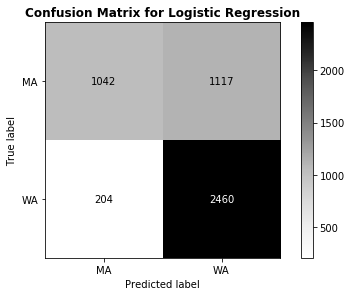

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

class_names = ['MA', 'WA']

plot_confusion_matrix(logistic_optim, x_test_svd, y_test, display_labels=class_names, 
                             values_format='d', cmap=plt.cm.Greys)
plt.tight_layout()
plt.title('Confusion Matrix for Logistic Regression', fontweight='bold')
plt.show()

In [43]:
# RandomForest: GridSearch
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

pipe_rfc = Pipeline([
    ('standardize', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42))
])

param_grid = {
    'model__max_depth': [10, 30, 50, 70, 100, 200, None]
}


grid_rfc = GridSearchCV(pipe_rfc, param_grid=param_grid, cv=KFold(5, shuffle=True, random_state=42), n_jobs=-1, verbose=1)
grid_rfc.fit(x_train_svd, y_train)

result_rfc = pd.DataFrame(grid_rfc.cv_results_)[['mean_test_score', 'param_model__max_depth']]
result_rfc = result_rfc.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
result_rfc.head()

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  35 | elapsed:   38.6s remaining:   17.7s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:  1.1min finished


,mean_test_score,param_model__max_depth
0,0.724766,30
1,0.722623,70
2,0.722623,100
3,0.722623,200
4,0.722623,None


In [44]:
pipe_rfc_optim = Pipeline([
        ('standardize', StandardScaler()),
        ('model', RandomForestClassifier(max_depth=30, random_state=42))
])

pipe_rfc_optim.fit(x_train_svd, y_train)

Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=30, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=42,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [45]:
y_pred_rfc = pipe_rfc_optim.predict(x_test_svd)
y_pred_prob_rfc = pipe_rfc_optim.predict_proba(x_test_svd)[:,1]

print('Logistic Regression:')
print('confusion_matrix:\n', confusion_matrix(y_test, y_pred_rfc))
print('accuracy:', accuracy_score(y_test, y_pred_rfc))
print('recall:', recall_score(y_test, y_pred_rfc))
print('precision:', precision_score(y_test, y_pred_rfc))
print('f1_score:', f1_score(y_test, y_pred_rfc))

Logistic Regression:
confusion_matrix:
 [[1320  839]
 [ 474 2190]]
accuracy: 0.7277628032345014
recall: 0.8220720720720721
precision: 0.7230108946847145
f1_score: 0.7693658879325488


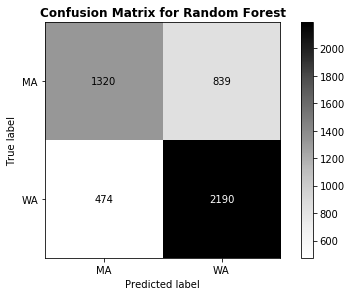

In [46]:
plot_confusion_matrix(pipe_rfc_optim, x_test_svd, y_test, display_labels=class_names, 
                             values_format='d', cmap=plt.cm.Greys)
plt.tight_layout()
plt.title('Confusion Matrix for Random Forest', fontweight='bold')
plt.show()

In [47]:
# GradientBoosting: GridSearch
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier

pipe_gbc = Pipeline([
    ('standardize', StandardScaler()),
    ('model', GradientBoostingClassifier(random_state=42))
])

param_grid = {
    'model__max_depth': [10, 30, 50, 70, 100, 200, None]
}


grid_gbc = GridSearchCV(pipe_gbc, param_grid=param_grid, cv=KFold(5, shuffle=True, random_state=42), n_jobs=-1, verbose=1)
grid_gbc.fit(x_train_svd, y_train)

result_gbc = pd.DataFrame(grid_gbc.cv_results_)[['mean_test_score', 'param_model__max_depth']]
result_gbc = result_gbc.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
result_gbc.head()

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  35 | elapsed:  8.1min remaining:  3.7min
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed: 14.0min finished


,mean_test_score,param_model__max_depth
0,0.721978,10
1,0.698132,30
2,0.687141,70
3,0.686980,100
4,0.686980,200


In [48]:
pipe_gbc_optim = Pipeline([
        ('standardize', StandardScaler()),
        ('model', GradientBoostingClassifier(max_depth=10, random_state=42))
])

pipe_gbc_optim.fit(x_train_svd, y_train)

Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=10, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
          

In [49]:
y_pred_gbc = pipe_gbc_optim.predict(x_test_svd)
y_pred_prob_gbc = pipe_gbc_optim.predict_proba(x_test_svd)[:,1]

print('Logistic Regression:')
print('confusion_matrix:\n', confusion_matrix(y_test, y_pred_gbc))
print('accuracy:', accuracy_score(y_test, y_pred_gbc))
print('recall:', recall_score(y_test, y_pred_gbc))
print('precision:', precision_score(y_test, y_pred_gbc))
print('f1_score:', f1_score(y_test, y_pred_gbc))

Logistic Regression:
confusion_matrix:
 [[1341  818]
 [ 496 2168]]
accuracy: 0.72755546340452
recall: 0.8138138138138138
precision: 0.7260549229738781
f1_score: 0.767433628318584


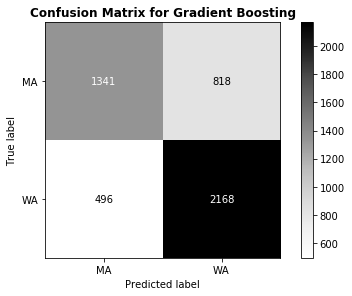

In [50]:
plot_confusion_matrix(pipe_gbc_optim, x_test_svd, y_test, display_labels=class_names, 
                             values_format='d', cmap=plt.cm.Greys)
plt.tight_layout()
plt.title('Confusion Matrix for Gradient Boosting', fontweight='bold')
plt.show()

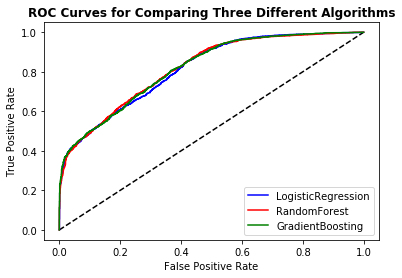

In [51]:
# aggregated ROC curves
from sklearn.metrics import roc_curve

fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_prob_logistic)
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_pred_prob_rfc)
fpr_gbc, tpr_gbc, _ = roc_curve(y_test, y_pred_prob_gbc)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_logistic, tpr_logistic, label = 'LogisticRegression', color='b', linewidth=1.5)
plt.plot(fpr_rfc, tpr_rfc, label = 'RandomForest', color='r', linewidth=1.5)
plt.plot(fpr_gbc, tpr_gbc, label = 'GradientBoosting', color='g', linewidth=1.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('ROC Curves for Comparing Three Different Algorithms', weight='bold')
plt.show()

## PART 3 - Define Your Own Project

In [52]:
import nltk
# nltk.download('wordnet')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from collections import defaultdict

# pos_tags: treebank to wordnet
tag_map = defaultdict(lambda: wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

wnl = WordNetLemmatizer()
    
def lemmatize_tweet(tweet):
    tokens = word_tokenize(tweet)
    words = [wnl.lemmatize(word, tag_map[tag[0]]) for word,tag in pos_tag(tokens) 
             if wnl.lemmatize(word, tag_map[tag[0]]).isalpha()]
    sentence = ' '.join(words)
    return sentence

In [53]:
import math
import json
import numpy as np
from textblob import TextBlob

def perform_sentiment_analysis(filename, min_time=pre_active_timestamp, max_time=post_active_timestamp):
    with open(filename, 'r') as file:
        lines = file.readlines()
        
        num_time_window = math.ceil((max_time - min_time) / (3600))
        
        # initialization
        sentiment_summary = []
        for _ in range(num_time_window):
            sentiment_summary.append([])
        positive_tweets, negative_tweets = np.zeros((num_time_window, 1)), np.zeros((num_time_window, 1))
            
        for line in lines:
            # retrieve index of one-hour time window
            json_obj = json.loads(line)
            date = json_obj['citation_date']
            if min_time <= date <= max_time:
                index = math.floor((date - min_time) / 3600)
                # sentiment polarity
                tweet = json_obj['tweet']['text']
                polarity = TextBlob(lemmatize_tweet(tweet)).sentiment.polarity
                if polarity > 0:
                    positive_tweets[index, 0] += 1
                elif polarity < 0:
                    negative_tweets[index, 0] += 1

                sentiment_summary[index].append(polarity)
        
        sentiment_dist = []
        for x in sentiment_summary:
            if x:
                sentiment_dist.append(np.mean(x))
            else:
                sentiment_dist.append(sentiment_dist[-1])
        return sentiment_dist, positive_tweets, negative_tweets

In [54]:
seahawks_sentiment, seahawks_positive, seahawks_negative = perform_sentiment_analysis('ECE219_tweet_data/tweets_#gohawks.txt')
patriots_sentiment, patriots_positive, patriots_negative = perform_sentiment_analysis('ECE219_tweet_data/tweets_#gopatriots.txt')

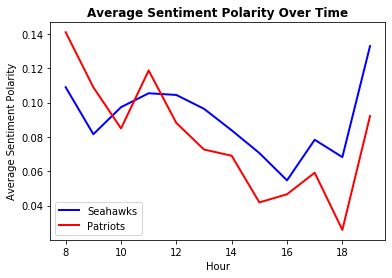

In [55]:
plt.plot(np.arange(8, 20), seahawks_sentiment, label='Seahawks', color='b', linewidth=2)
plt.plot(np.arange(8, 20), patriots_sentiment, label='Patriots', color='r', linewidth=2)
plt.xlabel('Hour')
plt.ylabel('Average Sentiment Polarity')
plt.legend()
plt.title('Average Sentiment Polarity Over Time', weight='bold')
plt.show()

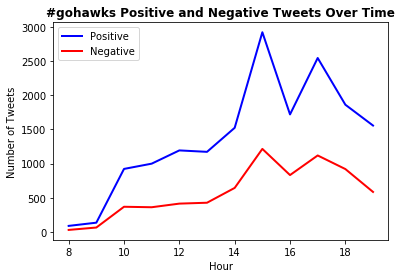

In [56]:
plt.plot(np.arange(8, 20), seahawks_positive, label='Positive', color='b', linewidth=2)
plt.plot(np.arange(8, 20), seahawks_negative, label='Negative', color='r', linewidth=2)
plt.xlabel('Hour')
plt.ylabel('Number of Tweets')
plt.legend()
plt.title('#gohawks Positive and Negative Tweets Over Time', weight='bold')
plt.show()

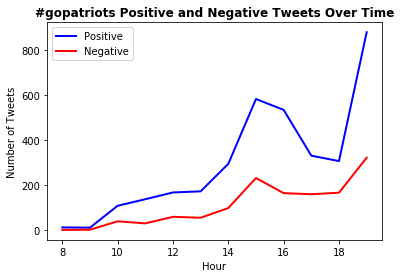

In [57]:
plt.plot(np.arange(8, 20), patriots_positive, label='Positive', color='b', linewidth=2)
plt.plot(np.arange(8, 20), patriots_negative, label='Negative', color='r', linewidth=2)
plt.xlabel('Hour')
plt.ylabel('Number of Tweets')
plt.legend()
plt.title('#gopatriots Positive and Negative Tweets Over Time', weight='bold')
plt.show()